## Capstone #1 - Reactive Dashboard

Agenda -

* Create a reactive dashboard (using Streamlit) on a dataset using all EDA & plotting techniques learnt so far

### IPL Dataset

Source: Kaggle [link](https://www.kaggle.com/nowke9/ipldata)

Objectives: 

- EDA
     - *_Variate analysis
- Plots
    - Bi-variate Plots
    - Multi-variate plots
- Reactive Dashboard
    - Perform Analysis based on User actions


### Questions -

1. Which team has the best overall performance? 
1. Which is the Best performing Team in 2019?
1. Best player or MVP in 2019?
1. Best player or MVP year on year
1. Most number of Wins in a year/season by a team
1. City with most number of IPL matches

![dashboar-architecture.png](../data/dashboar-architecture.png)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
matches = pd.read_csv("../data/IPL Data/matches.csv", index_col=0)
# deliveries = pd.read_csv("../data/IPL Data/deliveries.csv")

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

In [4]:
profile = ProfileReport(matches, title='Pandas Profiling Report', html={'style':{'full_width':True}})

TypeError: describe_boolean_1d() got an unexpected keyword argument 'title'

In [5]:
profile.to_notebook_iframe()

In [6]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches["win_by_runs"].value_counts()

0      419
14      13
4       11
10      11
1       10
      ... 
64       1
66       1
67       1
72       1
146      1
Name: win_by_runs, Length: 89, dtype: int64

In [8]:
list_of_teams = np.unique(matches[["team1", "team2"]]).tolist()

In [9]:
list_of_teams, len(list_of_teams)

(['Chennai Super Kings',
  'Deccan Chargers',
  'Delhi Capitals',
  'Delhi Daredevils',
  'Gujarat Lions',
  'Kings XI Punjab',
  'Kochi Tuskers Kerala',
  'Kolkata Knight Riders',
  'Mumbai Indians',
  'Pune Warriors',
  'Rajasthan Royals',
  'Rising Pune Supergiant',
  'Rising Pune Supergiants',
  'Royal Challengers Bangalore',
  'Sunrisers Hyderabad'],
 15)

In [10]:
matches_clean = matches[["team1", "team2"]].replace('Rising Pune Supergiant', 'Rising Pune Supergiants').copy()

In [11]:
list_of_teams = np.unique(matches_clean[["team1", "team2"]]).tolist()
list_of_teams, len(list_of_teams)

(['Chennai Super Kings',
  'Deccan Chargers',
  'Delhi Capitals',
  'Delhi Daredevils',
  'Gujarat Lions',
  'Kings XI Punjab',
  'Kochi Tuskers Kerala',
  'Kolkata Knight Riders',
  'Mumbai Indians',
  'Pune Warriors',
  'Rajasthan Royals',
  'Rising Pune Supergiants',
  'Royal Challengers Bangalore',
  'Sunrisers Hyderabad'],
 14)

In [12]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
matches["winner"].value_counts().head()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: winner, dtype: int64

In [14]:
matches["winner"].value_counts().head().reset_index()

,index,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82


In [15]:
px.bar(matches["winner"].value_counts().head().reset_index(), x="index", y="winner", barmode="group")

In [16]:
matches[["season","winner", "city"]].fillna("nan")

,season,winner,city
id,,,
1,2017,Sunrisers Hyderabad,Hyderabad
2,2017,Rising Pune Supergiant,Pune
3,2017,Kolkata Knight Riders,Rajkot
4,2017,Kings XI Punjab,Indore
5,2017,Royal Challengers Bangalore,Bangalore
...,...,...,...
11347,2019,Mumbai Indians,Mumbai
11412,2019,Mumbai Indians,Chennai
11413,2019,Delhi Capitals,Visakhapatnam


In [17]:
winner_yoy = pd.pivot_table(matches, values=["result"], index=["season"], columns=["winner"], aggfunc="count").T # total wins by team on yoy

In [36]:
matches.query("season == [2019]")["winner"].value_counts()

Mumbai Indians                 11
Chennai Super Kings            10
Delhi Capitals                 10
Kolkata Knight Riders           6
Sunrisers Hyderabad             6
Kings XI Punjab                 6
Royal Challengers Bangalore     5
Rajasthan Royals                5
Name: winner, dtype: int64

In [19]:
px.bar(matches, x="season", y="winner", barmode="group")

In [20]:
winner_yoy

season                              2008  2009  2010  2011  2012  2013  2014  \
       winner                                                                  
result Chennai Super Kings           9.0   8.0   9.0  11.0  10.0  12.0  10.0   
       Deccan Chargers               2.0   9.0   8.0   6.0   4.0   NaN   NaN   
       Delhi Capitals                NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       Delhi Daredevils              7.0  10.0   7.0   4.0  11.0   3.0   2.0   
       Gujarat Lions                 NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       Kings XI Punjab              10.0   7.0   4.0   7.0   8.0   8.0  12.0   
       Kochi Tuskers Kerala          NaN   NaN   NaN   6.0   NaN   NaN   NaN   
       Kolkata Knight Riders         6.0   3.0   7.0   8.0  12.0   6.0  11.0   
       Mumbai Indians                7.0   5.0  11.0  10.0  10.0  13.0   7.0   
       Pune Warriors                 NaN   NaN   NaN   4.0   4.0   4.0   NaN   
       Rajasthan Royals             13.0   6.0   6.0   6.0   7.0  11.0   7.0   
       Rising Pune Supergiant        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       Rising Pune Supergiants       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       Royal Challengers Bangalore   4.0   9.0   8.0  10.0   8.0   9.0   5.0   
       Sunrisers Hyderabad           NaN   NaN   NaN   NaN   NaN  10.0   6.0   

season                              2015  2016  2017  2018  2019  
       winner                                                     
result Chennai Super Kings          10.0   NaN   NaN  11.0  10.0  
       Deccan Chargers               NaN   NaN   NaN   NaN   NaN  
       Delhi Capitals                NaN   NaN   NaN   NaN  10.0  
       Delhi Daredevils              5.0   7.0   6.0   5.0   NaN  
       Gujarat Lions                 NaN   9.0   4.0   NaN   NaN  
       Kings XI Punjab               3.0   4.0   7.0   6.0   6.0  
       Kochi Tuskers Kerala          NaN   NaN   NaN   NaN   NaN  
       Kolkata Knight Riders         7.0   8.0   9.0   9.0   6.0  
       Mumbai Indians               10.0   7.0  12.0   6.0  11.0  
       Pune Warriors                 NaN   NaN   NaN   NaN   NaN  
       Rajasthan Royals              7.0   NaN   NaN   7.0   5.0  
       Rising Pune Supergiant        NaN   NaN  10.0   NaN   NaN  
       Rising Pune Supergiants       NaN   5.0   NaN   NaN   NaN  
       Royal Challengers Bangalore   8.0   9.0   3.0   6.0   5.0  
       Sunrisers Hyderabad           7.0  11.0   8.0  10.0   6.0

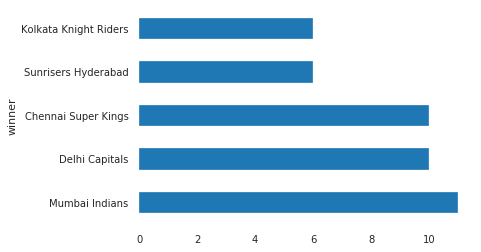

In [21]:
winner_yoy.loc["result"].iloc[:, -1].sort_values(ascending=False).head().plot.barh() # Most number of wins in 2019

In [22]:
winner_yoy.loc["result"].reset_index()

season,winner,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Chennai Super Kings,9.0,8.0,9.0,11.0,10.0,12.0,10.0,10.0,NaN,NaN,11.0,10.0
1,Deccan Chargers,2.0,9.0,8.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi Capitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,Delhi Daredevils,7.0,10.0,7.0,4.0,11.0,3.0,2.0,5.0,7.0,6.0,5.0,NaN
4,Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.0,NaN,NaN
5,Kings XI Punjab,10.0,7.0,4.0,7.0,8.0,8.0,12.0,3.0,4.0,7.0,6.0,6.0
6,Kochi Tuskers Kerala,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kolkata Knight Riders,6.0,3.0,7.0,8.0,12.0,6.0,11.0,7.0,8.0,9.0,9.0,6.0
8,Mumbai Indians,7.0,5.0,11.0,10.0,10.0,13.0,7.0,10.0,7.0,12.0,6.0,11.0
9,Pune Warriors,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
 # Most number of wins in 2019
fig = px.density_heatmap(winner_yoy.loc["result"].reset_index().fillna(0), x="winner", y=2008)
fig

In [24]:
matches.query('winner == ["Mumbai Indians"]').groupby(["season","city"]).count()["date"] # queries on winner column

season  city     
2008    Bangalore    1
        Hyderabad    1
        Kolkata      1
        Mumbai       4
2009    Cape Town    1
                    ..
2019    Bengaluru    1
        Chennai      2
        Delhi        1
        Hyderabad    2
        Mumbai       5
Name: date, Length: 61, dtype: int64

In [25]:
pd.pivot_table(matches.query('winner == ["Mumbai Indians"]'), values=["date"], index=["season", "city"], aggfunc="count") # no. of matches played per city per year

date
season city           
2008   Bangalore     1
       Hyderabad     1
       Kolkata       1
       Mumbai        4
2009   Cape Town     1
...                ...
2019   Bengaluru     1
       Chennai       2
       Delhi         1
       Hyderabad     2
       Mumbai        5

[61 rows x 1 columns]

In [26]:
matches["player_of_match"].value_counts().head() # MoM all time

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

In [27]:
pd.pivot_table(matches, values=["date"], index=["season", "player_of_match"], aggfunc="count").sort_values(["season", "date"], ascending=[True, False])

date
season player_of_match      
2008   SE Marsh            5
       SR Watson           4
       YK Pathan           4
       AC Gilchrist        2
       M Ntini             2
...                      ...
2019   SL Malinga          1
       SPD Smith           1
       SS Iyer             1
       V Kohli             1
       VR Aaron            1

[514 rows x 1 columns]

In [28]:
mom_yoy = pd.pivot_table(matches.query("season == 2008"), values=["date"], index=["player_of_match"], aggfunc="count").sort_values(["date"], ascending=[False]) # PoM yoy basis

In [29]:
mom_yoy

,date
player_of_match,
SE Marsh,5
YK Pathan,4
SR Watson,4
ST Jayasuriya,2
M Ntini,2
SC Ganguly,2
MS Dhoni,2
SM Pollock,2
Sohail Tanvir,2


In [118]:
import requests
import json
from pathlib import os
from tqdm import tqdm

In [98]:
KEY = os.getenv("GEO_KEY", "6311029ad6bf491f9fc9b589d510ac61")
print(KEY)

6311029ad6bf491f9fc9b589d510ac61


In [108]:
def get_latlong(place: str):
    url = f"https://api.opencagedata.com/geocode/v1/json?q={place}&key={KEY}"
    res = requests.get(url)
    return json.loads(res.text)

In [100]:
cities = matches["city"].unique().tolist()

In [113]:
cities

['Hyderabad',
 'Pune',
 'Rajkot',
 'Indore',
 'Bangalore',
 'Mumbai',
 'Kolkata',
 'Delhi',
 'Chandigarh',
 'Kanpur',
 'Jaipur',
 'Chennai',
 'Cape Town',
 'Port Elizabeth',
 'Durban',
 'Centurion',
 'East London',
 'Johannesburg',
 'Kimberley',
 'Bloemfontein',
 'Ahmedabad',
 'Cuttack',
 'Nagpur',
 'Dharamsala',
 'Kochi',
 'Visakhapatnam',
 'Raipur',
 'Ranchi',
 'Abu Dhabi',
 'Sharjah',
 nan,
 'Mohali',
 'Bengaluru']

In [119]:
latlongs = [get_latlong(city) for city in tqdm(cities)]

100%|██████████| 33/33 [01:27<00:00,  2.65s/it]


In [126]:
city_filtered_latlong = [latlong["results"][0]["geometry"] for latlong in tqdm(latlongs)]

100%|██████████| 33/33 [00:00<00:00, 55012.73it/s]


In [129]:
latlong_dict = {cities[i]:latlong for i, latlong in enumerate(city_filtered_latlong)}

In [ ]:
latlong_dict

In [137]:
matches["lat"] = matches["city"].apply(lambda x: latlong_dict.get(x).get("lat"))
matches["lng"] = matches["city"].apply(lambda x: latlong_dict.get(x).get("lng"))

In [139]:
matches.to_csv("../data/matches_lat_long.csv")

In [140]:
matches

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,lat,lng
id,,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,17.388786,78.461065
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,18.521428,73.854454
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,22.305199,70.802834
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,22.720362,75.868200
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,12.979120,77.591300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,18.938771,72.835335
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,13.080172,80.283833
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,17.723128,83.301284


In [175]:
matches_bycity = pd.pivot_table(matches, values=["date"], index=["city"], columns=["season"], aggfunc="count", fill_value=0).reset_index()

In [159]:
matches_bycity["lat"] = matches_bycity["city"].apply(lambda x: latlong_dict.get(x).get("lat"))
matches_bycity["lng"] = matches_bycity["city"].apply(lambda x: latlong_dict.get(x).get("lng"))

In [185]:
mb = matches_bycity.T.reset_index().T.drop("level_0").copy()

In [187]:
mb.columns = mb.loc["season"]

In [212]:
mb = mb.reset_index().T.iloc[:, 1:].T.drop("index", axis=1) # crazy way of normalizing the table... there would be a better way to do this!

In [213]:
mb["lat"] = matches_bycity["city"].apply(lambda x: latlong_dict.get(x).get("lat"))
mb["lng"] = matches_bycity["city"].apply(lambda x: latlong_dict.get(x).get("lng"))

In [226]:
mb.columns = ['City',  "2008",  "2009",  "2010",  "2011",  "2012",  "2013",  "2014",  "2015",  "2016",
        "2017",  "2018",  "2019", 'lat', 'lng']

In [227]:
mb.head()

,City,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,lat,lng
1,Abu Dhabi,0,0,0,0,0,0,7,0,0,0,0,0,23.021624,72.579707
2,Ahmedabad,0,0,4,0,0,0,4,4,0,0,0,0,12.979120,77.591300
3,Bangalore,7,0,7,6,8,8,6,7,9,8,0,0,12.979120,77.591300
4,Bengaluru,0,0,0,0,0,0,0,0,0,0,7,7,-29.116395,26.215496
5,Bloemfontein,0,2,0,0,0,0,0,0,0,0,0,0,-33.928992,18.417396


In [237]:
mb.to_csv("../data/matches_cities_lat_long.csv")

In [235]:
fig = px.scatter_mapbox(mb[["City", "lat", "lng", "2019"]], lat="lat", lon="lng", color="2019",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

In [236]:
fig

In [37]:
def do_something(name: str):
    return f"Hello {name}"

In [ ]:
http://api.kossine.com/hello?name="Atharva"
        